In [1]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
from scipy.optimize import curve_fit

import json
from skrf.media import *
from skrf import Frequency

[scipy curve fit docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [2]:
data_corrected = rf.read_all('jpa-nopump-scan2-s1p-corrected')

In [4]:
fghz = data_corrected['trace0'].f/1e9
file_object = open("biaswave.json", "r")
period = 1.85
biaswave = json.loads(file_object.read())
file_object.close()
biaswave = np.array(biaswave)
phiwave = biaswave/period
phasexy = []
for index in range(len(data_corrected)):
    phasexy.append(data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0])
phasexy= np.array(phasexy)
phasexy = np.unwrap(phasexy.transpose(),period=360)


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_20692\18248192.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Flux Bias [$\phi/\phi_0$]")


Text(0.5, 0, 'Flux Bias [$\\phi/\\phi_0$]')

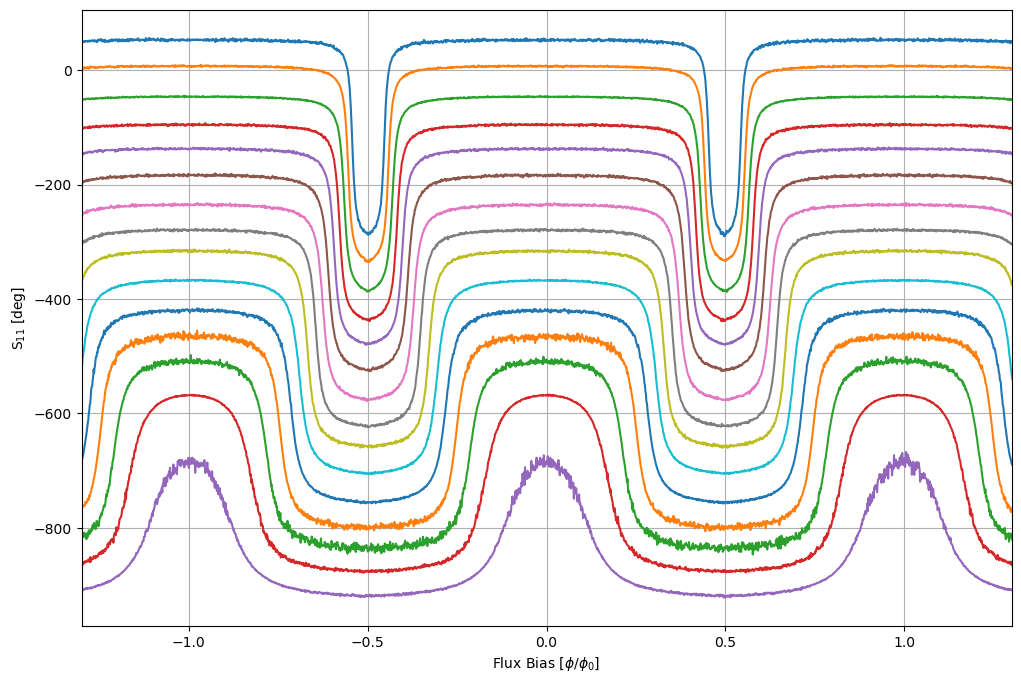

In [8]:
plt.figure(figsize=(12, 8))    
for index in range(15):
    plt.plot(phiwave,phasexy[100*index])
plt.xlim(biaswave[0],biaswave[len(biaswave) - 1])
plt.grid()
plt.xlim(-1.3,1.3)
plt.ylabel("S$_{11}$ [deg]")
plt.xlabel("Flux Bias [$\phi/\phi_0$]")

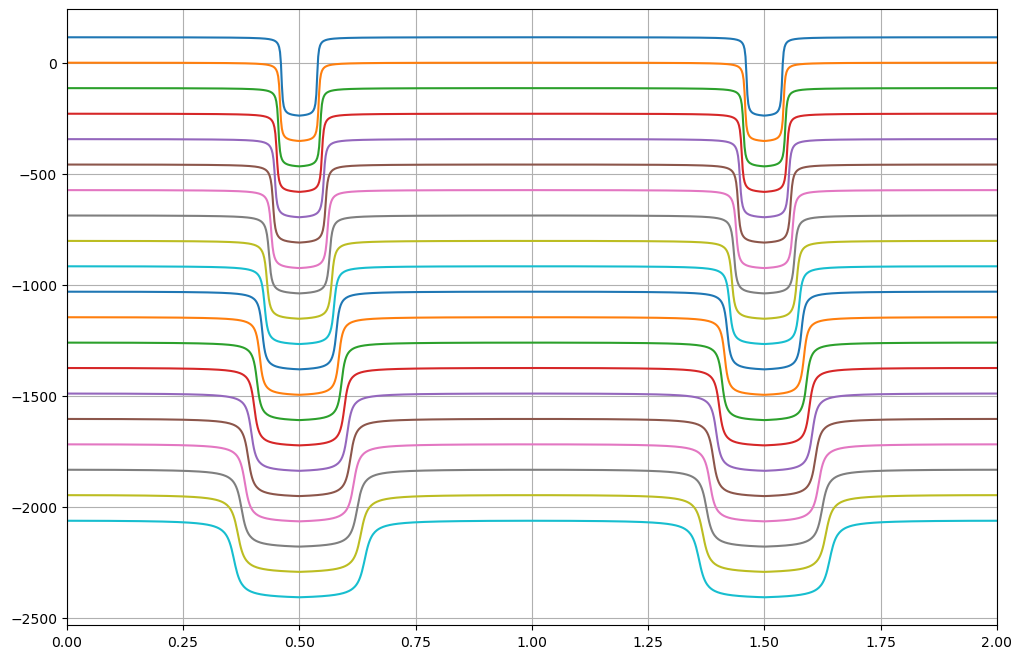

In [9]:
Cin = 0.5e-12
C0 = 4e-12
L0 = 30e-12
Lj = 40e-12
f = 1e9*fghz
omega = 2*np.pi*f
phi = 0.24
f_360 = 0.5e9

phasetheory2d = []
phiwavetheory = np.linspace(0,2,1000)
for phi in np.linspace(0,1,1000):
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(f_360))
    s_jpa_unwrapped = np.unwrap(np.angle(phaseshift*s_jpa))
    
    phasetheory2d.append(s_jpa_unwrapped)
phasetheory2d = np.array(phasetheory2d)
phasetheory2d = np.unwrap(180*phasetheory2d.transpose()/np.pi,period=-360)
phasetheory2d = phasetheory2d.transpose()
plt.figure(figsize=(12, 8))    

#plt.imshow(np.unwrap(phasetheory2d.transpose()))
for index in range(20):
    plt.plot(phiwavetheory,phasetheory2d.transpose()[50*index])
plt.xlim(0,2)
plt.grid()

In [349]:
def jpa_func(phi,frequency, Cin, C0, L0, Lj, f_360):
    omega = 2*np.pi*frequency
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa = 180*np.angle(phaseshift*s_jpa)/np.pi

    Z_jpa0 = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj)/(1 - omega*omega*C0*(L0 + Lj)))
    s_jpa0 = (50 - Z_jpa0)/(50 + Z_jpa0)
    s_jpa0 = 180*np.angle(phaseshift*s_jpa0)/np.pi

    return s_jpa - s_jpa0

(-1.0, 1.0)

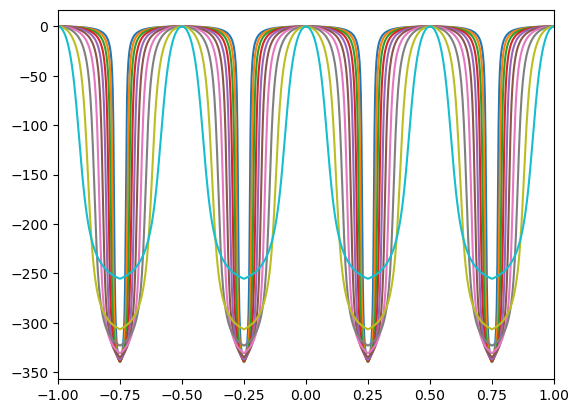

In [353]:
for freq in np.linspace(4e9,8e9,10):
    plt.plot(biaswave,np.unwrap(jpa_func(biaswave,freq, Cin*2, C0, L0, Lj, f_360),period = 360))
plt.grid
plt.xlim(-1,1)


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_13544\3905956881.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Flux Bias [$\phi/\phi_0$]")


Text(0.5, 0, 'Flux Bias [$\\phi/\\phi_0$]')

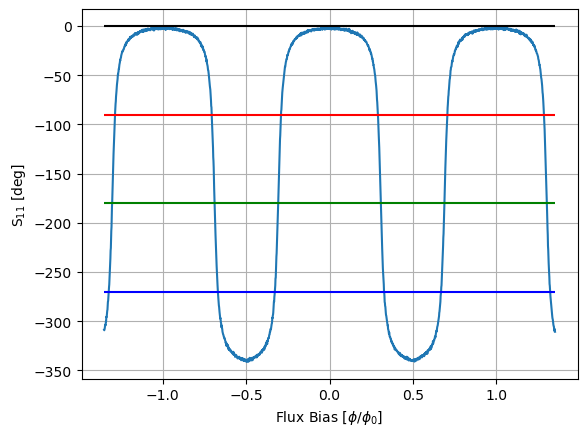

In [61]:
plt.plot(phiwave,phasexy[900] +365)
plt.grid()
#plt.xlim(-1.3,1.3)
plt.hlines([0,-90,-180,-270],phiwave[0],phiwave[len(phiwave) - 1],colors=["black","red","green","blue"])
plt.ylabel("S$_{11}$ [deg]")
plt.xlabel("Flux Bias [$\phi/\phi_0$]")

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_13544\1320987667.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Flux Bias [$\phi/\phi_0$]")


Text(0.5, 0, 'Flux Bias [$\\phi/\\phi_0$]')

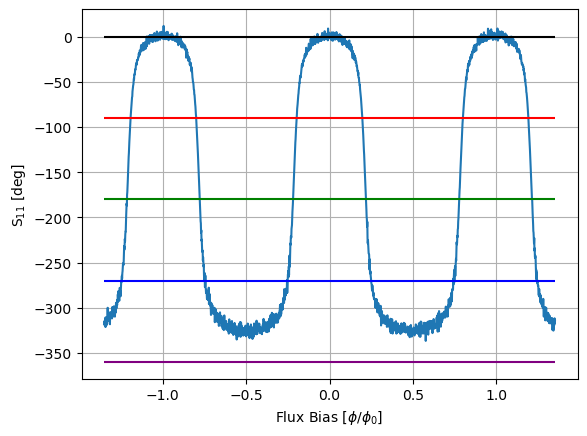

In [77]:
plt.plot(phiwave,phasexy[1200] + 510)
plt.grid()
#plt.xlim(-1.3,1.3)
plt.hlines([0,-90,-180,-270,-360],phiwave[0],phiwave[len(phiwave) - 1],colors=["black","red","green","blue","purple"])
plt.ylabel("S$_{11}$ [deg]")
plt.xlabel("Flux Bias [$\phi/\phi_0$]")


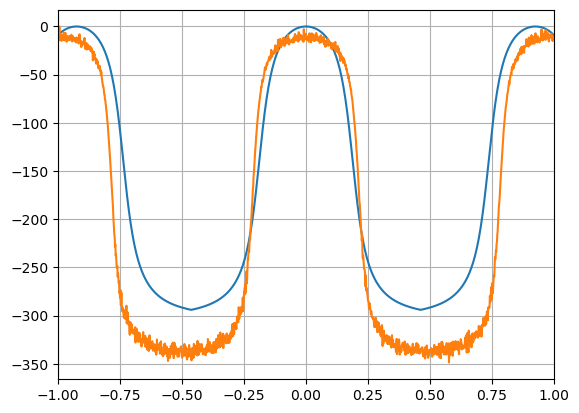

In [365]:
freq = 7.75e9
Cin = 1e-12
C0 = 5e-12
L0 = 3.3e-11
Lj = 4e-11
f_360 = 15e9

theorywave = np.unwrap(jpa_func(phiwave,freq, Cin, C0, L0, Lj, f_360),period = 360) 
theorywave = theorywave - np.max(theorywave)
plt.plot(biaswave,theorywave)
plt.plot(phiwave,phasexy[1200] - np.max(phasexy[1200]))
plt.xlim(-1,1)
plt.grid()

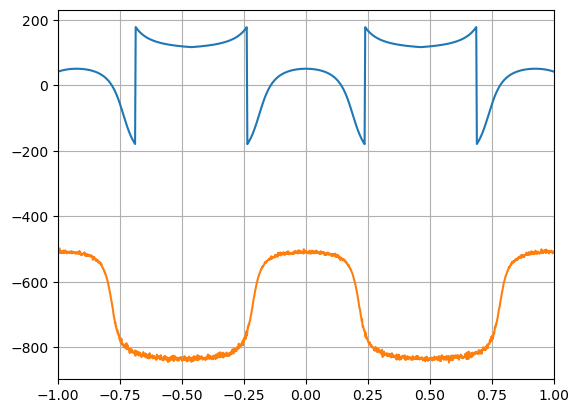

In [341]:
freq = 7.75e9
Cin = 1e-12
C0 = 5e-12
L0 = 3.3e-11
Lj = 4e-11
f_360 = 1.5e9

plt.plot(biaswave,jpa_func(phiwave,freq, Cin, C0, L0, Lj, f_360) )
plt.plot(phiwave,phasexy[1200])
plt.xlim(-1,1)
plt.grid()

In [277]:
print(Cin)
print(C0)
print(L0*1.1)
print(Lj)
print(f_360)


1e-12
5e-12
3.3e-11
4e-11
500000000.0


In [271]:
f_360 - 0.5e9

0.0

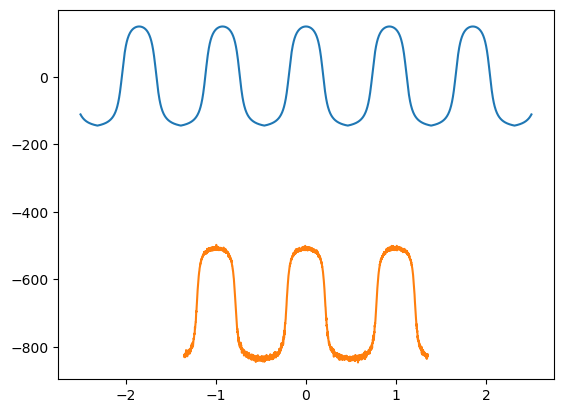

In [319]:
popt, pcov = curve_fit(jpa_func, phiwave, phasexy[1200] + 720,p0=[freq,Cin,C0,L0,Lj,f_360],bounds=((7.75e9,1e-12,5e-12,3.3e-11,4e-11,0.5e9),(7.75001e9,1.01e-12,5.01e-12,3.301e-11,4.01e-11,0.501e9)))
plt.plot(biaswave,np.unwrap(jpa_func(phiwave,popt[0], popt[1],popt[2], popt[3], popt[4], 10*popt[5]),period = 360))
plt.plot(phiwave,phasexy[1200])

In [291]:
popt

array([7.75001e+09, 1.01000e-12, 5.01000e-12, 3.30100e-11, 4.01000e-11,
       5.00000e+08])

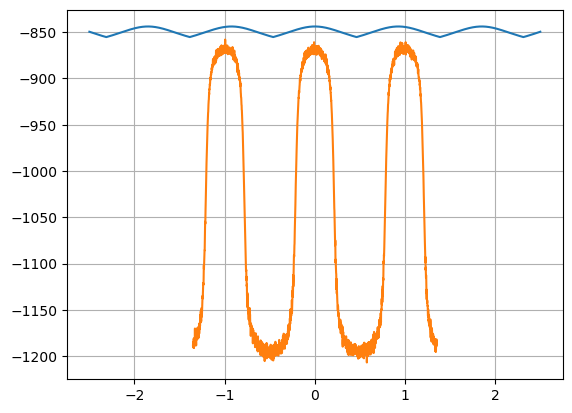

In [237]:
popt, pcov = curve_fit(jpa_func, phiwave, phasexy[1200],p0=[7.75e9,1e-12,5e-12,3.3e-11,4e-11,0.5e9],bounds=((7.75e9,9e-13,4e-12,2e-11,2e-11,0.5e9),(7.75001e9,12e-13,6e-12,5e-11,6e-11,0.6e9)))
plt.plot(biaswave,np.unwrap(jpa_func(phiwave,popt[0], popt[1],popt[2], popt[3], popt[4], popt[5]),period = 360) - 720)
plt.plot(phiwave,phasexy[1200]-360)

#plt.plot(phiwave,phasexy[1200])
#plt.xlim(-1,1)
plt.grid()

In [211]:
popt

array([7.75050986e+09, 1.00000000e-12, 1.00000000e-11, 1.00000000e-10,
       1.00000000e-10, 1.16811333e+09])

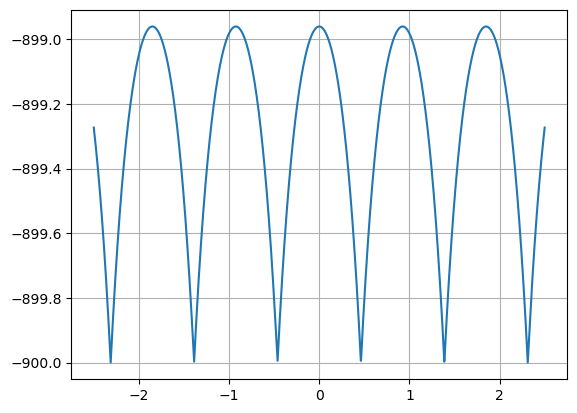

In [209]:
plt.plot(biaswave,np.unwrap(jpa_func(phiwave,popt[0], popt[1],popt[2], popt[3], popt[4], popt[5]),period = 360) - 720)
#plt.plot(phiwave,phasexy[1200])
#plt.xlim(-1,1)
plt.grid()

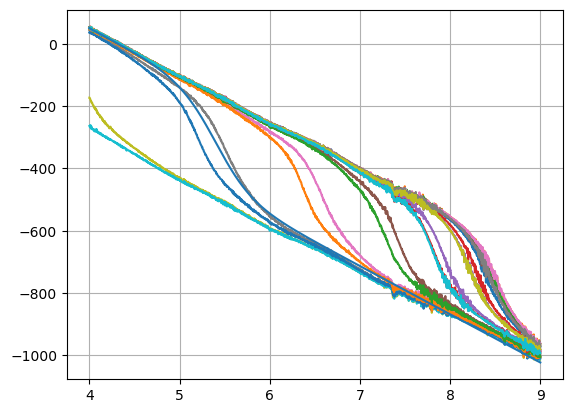

In [105]:
for index in range(20):
    plt.plot(fghz,phasexy.transpose()[200 + index*50])
plt.plot(fghz, 670 - 360*fghz*0.43 - 150*(np.tanh((fghz - 5.4)/0.4) + 1))
plt.grid()

In [11]:
def jpa_func_f(frequency, phi, Cin, C0, L0, Lj, f_360):
    omega = 2*np.pi*frequency
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa = 180*np.angle(phaseshift*s_jpa)/np.pi
    return s_jpa

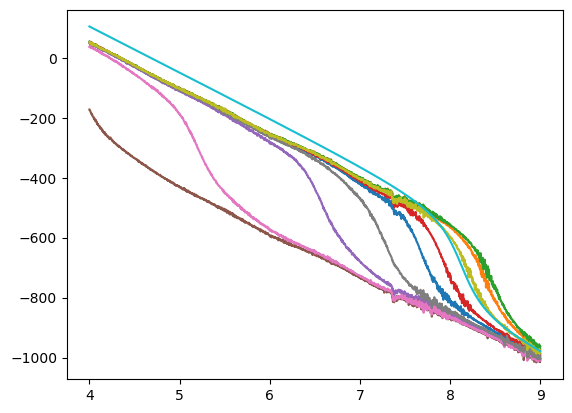

In [13]:
plt.plot(fghz,phasexy.transpose()[100])
plt.plot(fghz,phasexy.transpose()[200])
plt.plot(fghz,phasexy.transpose()[300])
plt.plot(fghz,phasexy.transpose()[400])
plt.plot(fghz,phasexy.transpose()[500])
plt.plot(fghz,phasexy.transpose()[600])
plt.plot(fghz,phasexy.transpose()[700])
plt.plot(fghz,phasexy.transpose()[800])
plt.plot(fghz,phasexy.transpose()[900])
theorywave = jpa_func_f(fghz*1e9,0.17, 0.6*Cin, C0*0.7, L0*1.5, Lj, 0.4e9)
plt.plot(fghz,np.unwrap(theorywave,period = 360) + 180)

In [33]:
Lj

4e-11

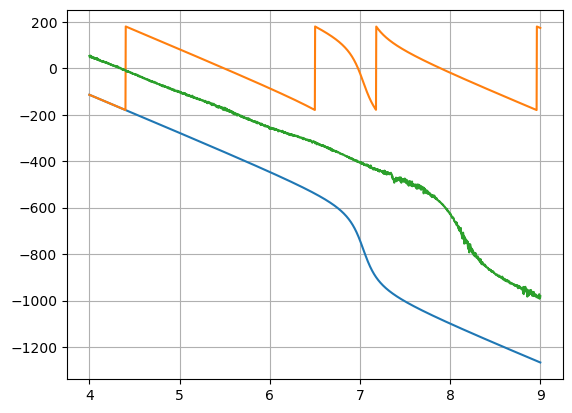

In [51]:

phi, Cin, C0, L0, Lj, f_360 = 0.17, 3e-13, 2.8e-12, 4.5e-11, 4e-11, 0.4e9

popt, pcov = curve_fit(jpa_func_f, fghz*1e9, phasexy.transpose()[150],p0=[phi,Cin,C0,L0,Lj,f_360],bounds=((0.16,2e-13,2e-12,3e-11,3e-11,0.3e9),(0.17,4e-13,4e-12,5e-11,5.01e-11,0.50e9)))
plt.plot(fghz,np.unwrap(jpa_func_f(fghz*1e9,popt[0], popt[1],popt[2], popt[3], popt[4], popt[5]),period = 360))
plt.plot(fghz,jpa_func_f(fghz*1e9,popt[0], popt[1],popt[2], popt[3], popt[4], popt[5]))
plt.plot(fghz,phasexy.transpose()[150])
plt.grid()


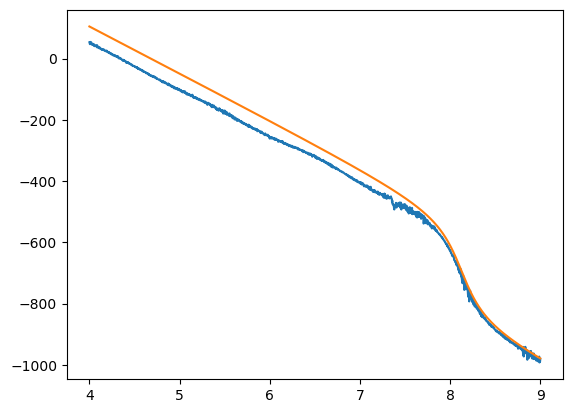

In [25]:
plt.plot(fghz,phasexy.transpose()[150])
theorywave = jpa_func_f(fghz*1e9,0.17, 0.6*Cin, C0*0.7, L0*1.5, Lj, 0.4e9)
plt.plot(fghz,np.unwrap(theorywave,period = 360) + 180)

In [125]:
def jpa_func_f_complex(frequency, phi, Cin, C0, L0, Lj, f_360):
    omega = 2*np.pi*frequency
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa = phaseshift*s_jpa
    return s_jpa

In [109]:
xy = []
for index in range(len(data_corrected)):
    xy.append(data_corrected['trace' + str(index)].s11.s[:,0,0])
xy = np.array(xy)

$$
\omega = 2\pi f
$$
$$
Z_{JPA} = \frac{1}{i\omegaC_{in}} + \left(\frac{}{}\right)
$$

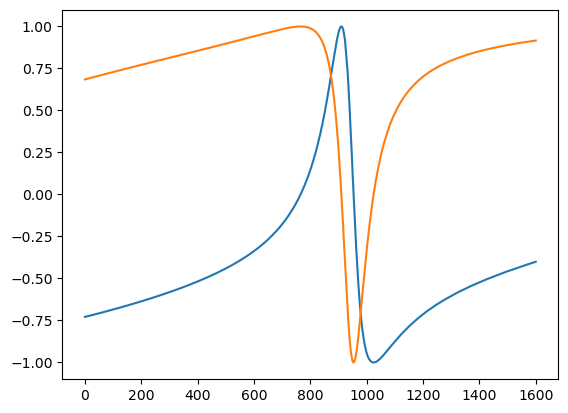

In [205]:
def jpa_func_f_complex2(frequency, phi, Cin, C0, L0, Lj):
    omega = 2*np.pi*frequency
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    return s_jpa
    
phi, Cin, C0, L0, Lj, f_360 = 0.8, 3e-13, 2.8e-12, 4.5e-11, 4e-11, 10000e9

theorywave = jpa_func_f_complex(fghz*1e9,phi,Cin, C0, L0, Lj,f_360)
plt.plot(np.real(theorywave))
plt.plot(np.imag(theorywave))



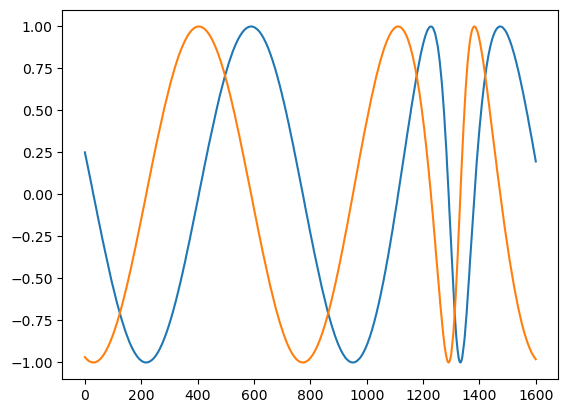

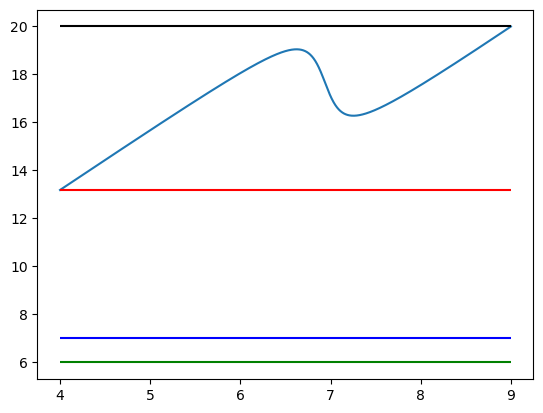

In [209]:
plt.plot(fghz,np.unwrap(np.angle(theorywave)) + 2.7*fghz)
#plt.plot(fghz,6.6 - 2.85*np.tanh((fghz - 6.9)/0.3))
plt.hlines([np.max(np.unwrap(np.angle(theorywave)) + 2.7*fghz),np.min(np.unwrap(np.angle(theorywave)) + 2.7*fghz),6,7],fghz[0],fghz[len(fghz) - 1],colors=["black","red","green","blue"])


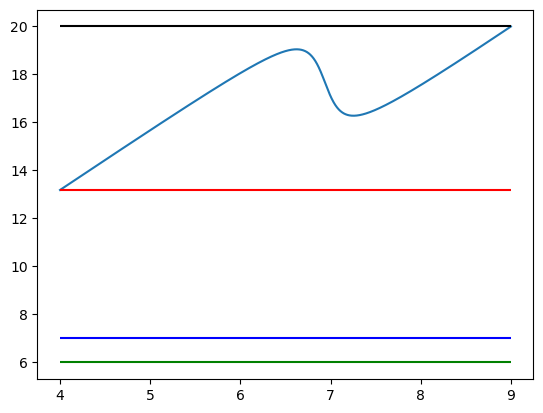

In [201]:
plt.plot(fghz,np.unwrap(np.angle(theorywave)) + 2.7*fghz)
#plt.plot(fghz,6.6 - 2.85*np.tanh((fghz - 6.9)/0.3))


np.min(np.unwrap(np.angle(theorywave)) + 2.7*fghz)

plt.hlines([np.max(np.unwrap(np.angle(theorywave)) + 2.7*fghz),np.min(np.unwrap(np.angle(theorywave)) + 2.7*fghz),6,7],fghz[0],fghz[len(fghz) - 1],colors=["black","red","green","blue"])


In [10]:
def jpa_func_f_cat(fcat, phi, CinpF, C0pF, L0pH, LjpH, f_360GHz):
    Cin = CinpF*1e-12
    C0 = C0pF*1e-12
    L0 = L0pH*1e-12
    Lj = LjpH*1e-12
    f_360 = f_360GHz*1e9
    omega = 2*np.pi*fcat[:int(len(fcat)/2)]
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa = phaseshift*s_jpa
    s_jpa_cat = np.concatenate((np.real(s_jpa),np.imag(s_jpa)))
    return s_jpa_cat
    

In [12]:
xycat = []
for xywave in xy:
    xycat.append(np.concatenate((np.real(xywave),np.imag(xywave))))
fcat = np.concatenate((1e9*fghz,1e9*fghz))


NameError: name 'xy' is not defined

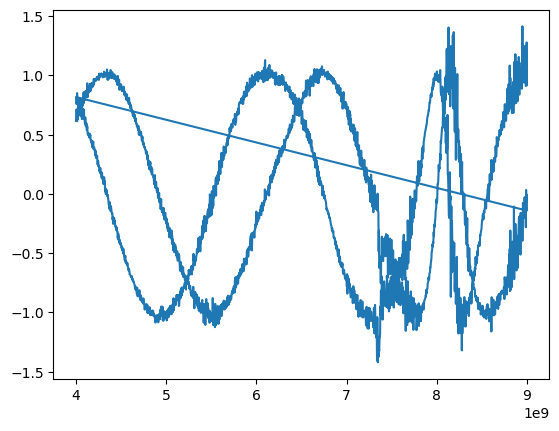

In [139]:
plt.plot(fcat,xycat[150])

In [256]:
phi, Cin, C0, L0, Lj, f_360 = 0.17, 0.3, 2.8, 45, 40, 0.4

theorywave = jpa_func_f_cat(fcat,phi,Cin, C0, L0, Lj,f_360)


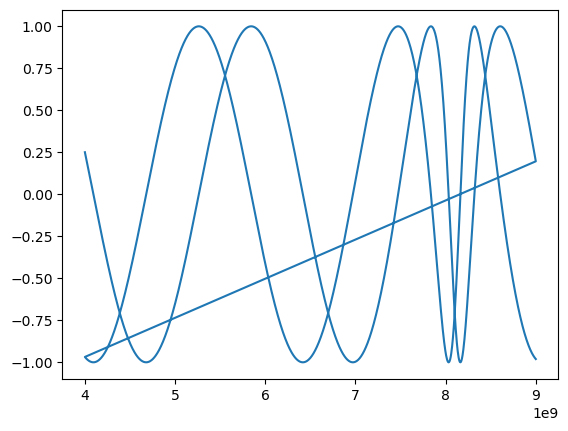

In [258]:
plt.plot(fcat,theorywave)

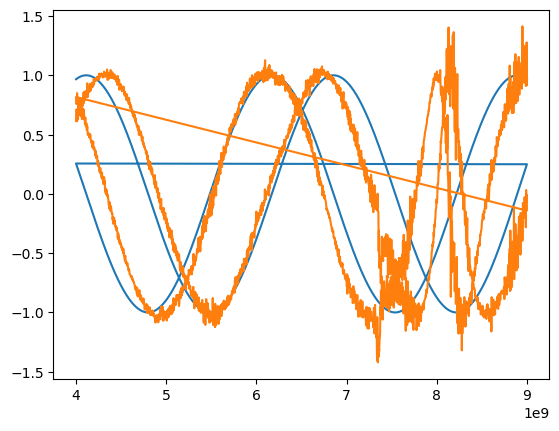

In [268]:
phiindex = 150

phi, Cin, C0, L0, Lj, f_360 = 0.17, 0.3, 2.8, 45, 40, 0.5

phi = phiwave[phiindex]

popt, pcov = curve_fit(jpa_func_f_cat, fcat, xycat[phiindex],p0=[phi,Cin,C0,L0,Lj,f_360],bounds=((phi,.3,2.8,45,40,0.5),(phi + 0.001,0.4,4,50,50,0.5)))
plt.plot(fcat,jpa_func_f_cat(fcat,popt[0],popt[1], popt[2], popt[3], popt[4],popt[5]))
plt.plot(fcat,xycat[150])

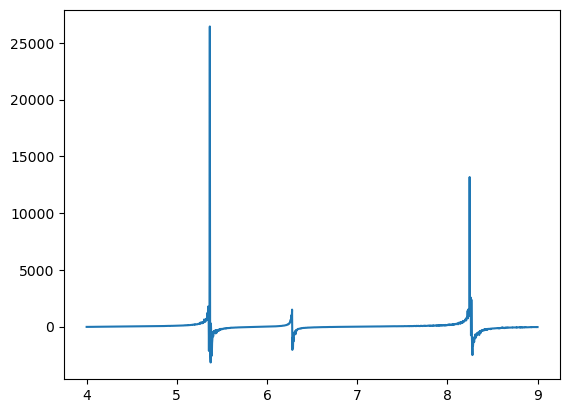

In [151]:
s11 = data_corrected['trace0'].s11.s[:,0,0]
z = 50*(1 - s11)/(1 + s11)
plt.plot(fghz,np.imag(z))

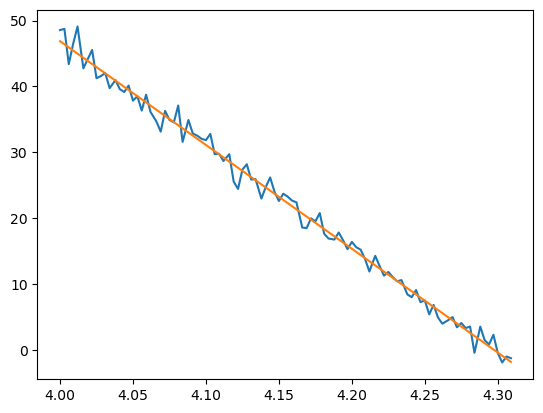

In [167]:
plt.plot(fghz[:100],data_corrected['trace0'].s_deg_unwrap[:100,0,0])
linslope,linoffset = np.polyfit(fghz[:100], data_corrected['trace0'].s_deg_unwrap[:100,0,0], 1)
plt.plot(fghz[:100],linoffset + linslope*fghz[:100])



Text(0, 0.5, 'Phase Angle - linear fit [deg]')

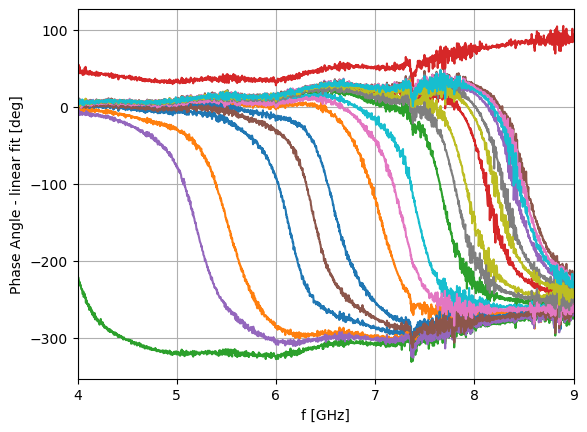

In [197]:
for index in range(20):
    plt.plot(fghz, data_corrected['trace' + str(index*50)].s_deg_unwrap[:,0,0] - linoffset - linslope*fghz)
plt.grid()
plt.xlim(fghz[0],fghz[len(fghz) - 1])
plt.xlabel("f [GHz]")
plt.ylabel("Phase Angle - linear fit [deg]")